# Calcul bayésien exact et approché

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math

   ## 1.Modèle Poisson-Gamma

### T1.

La loi a posteriori dans ce cas est

$$\pi(\theta|\textbf{y}) = \frac{1}{Z(\textbf{y})} \pi(\theta) \mathcal{L}(\theta;\textbf{y})$$

et donc 

$$\pi(\theta|\textbf{y}) \propto \pi(\theta) \mathcal{L}(\theta;\textbf{y})$$
ou: 
$
\begin{cases}
    \pi(\theta) = \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b\theta}\\
    \mathcal{L}(\theta;\textbf{y}) = \prod_{i=1}^{n}p(y_i,\theta) = \prod_{i=1}^{n}(\frac{\theta^{y_i}}{y_i!} e^{-\theta}) = \frac{1}{\prod_{i=1}^{n}y_i!} \theta^{\sum_{i=1}^{n}y_i} e^{-n\theta}
\end{cases}\\
\Rightarrow 
\begin{cases}
    \pi(\theta) \propto \theta^{a-1} e^{-b\theta}\\
    \mathcal{L}(\theta;\textbf{y}) \propto \theta^{\sum_{i=1}^{n}y_i} e^{-n\theta}
\end{cases}
$

Alors on a 
$$\pi(\theta|\textbf{y}) \propto \theta^{a-1} e^{-b\theta} \theta^{\sum_{i=1}^{n}y_i} e^{-n\theta}\\

\Rightarrow \pi(\theta|\textbf{y}) \propto \theta^{a+\sum_{i=1}^{n}y_i-1} e^{-\theta(b+n)} \\
\Rightarrow \pi(\theta|\textbf{y}) \propto Gamma(a+\sum_{i=1}^{n}y_i,  b+n)
$$
Vu que ils sont tout les deux des densités donc on peut conclure que $\pi(\theta|\textbf{y})$ est de loi $Gamma(a+\sum_{i=1}^{n}y_i,  b+n)$


### T2.

Soit S une fonction de $\mathbb{R}^n \to \mathbb{R}$ telle que $S(x_1,x_2,...,x_n) = \sum_{i=1}^{n}x_i$ 

Alors la loi a posteriori est de loi $Gamma(a+S(\textbf{y}), b+n)$

On a $y_1, y_2,..., y_n$ sont indépendants
$\Rightarrow 
\begin{cases}
    \mathbb{E}[S(\textbf{y})] = \sum_{i=1}^{n}\mathbb{E}[y_i] = n\theta_0 \\
    Var(S(\textbf{y})) = \sum_{i=1}^{n}Var(y_i) = n\theta_0 \\
\end{cases}
$




### S1.


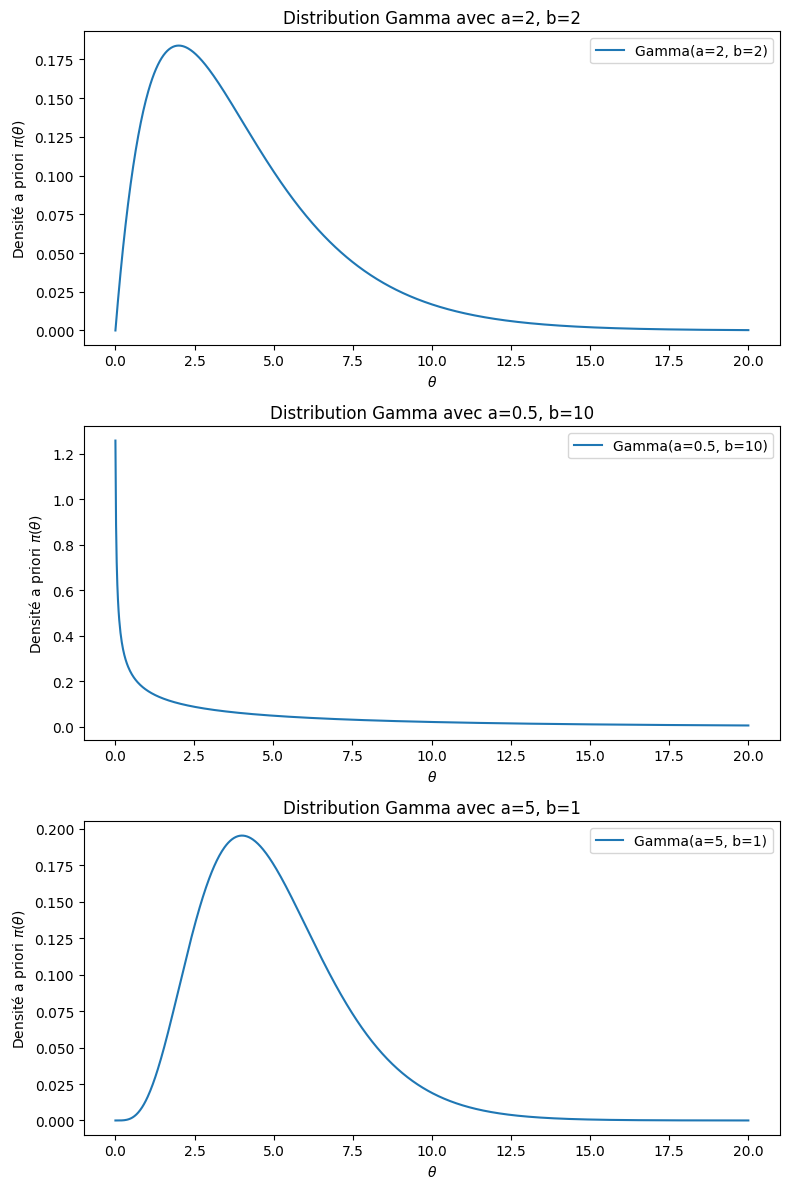

In [2]:
# Définir les paramètres pour les distributions Gamma
parametres = [(2, 2), (0.5, 10), (5, 1)]

# Créer une figure avec 3 sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Définir la plage de valeurs theta pour les graphiques
theta = np.linspace(0, 20, 1000)

for i, (a, b) in enumerate(parametres):
    # Calculer la densité de probabilité Gamma
    y = sps.gamma.pdf(theta, a, scale=b)
    
    # Tracer la densité de probabilité Gamma
    axs[i].plot(theta, y, label=f'Gamma(a={a}, b={b})')
    axs[i].set_title(f'Distribution Gamma avec a={a}, b={b}')
    axs[i].set_xlabel(r'$\theta$')
    axs[i].set_ylabel(r'Densité a priori $\pi(\theta)$')
    axs[i].legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()


### S2.


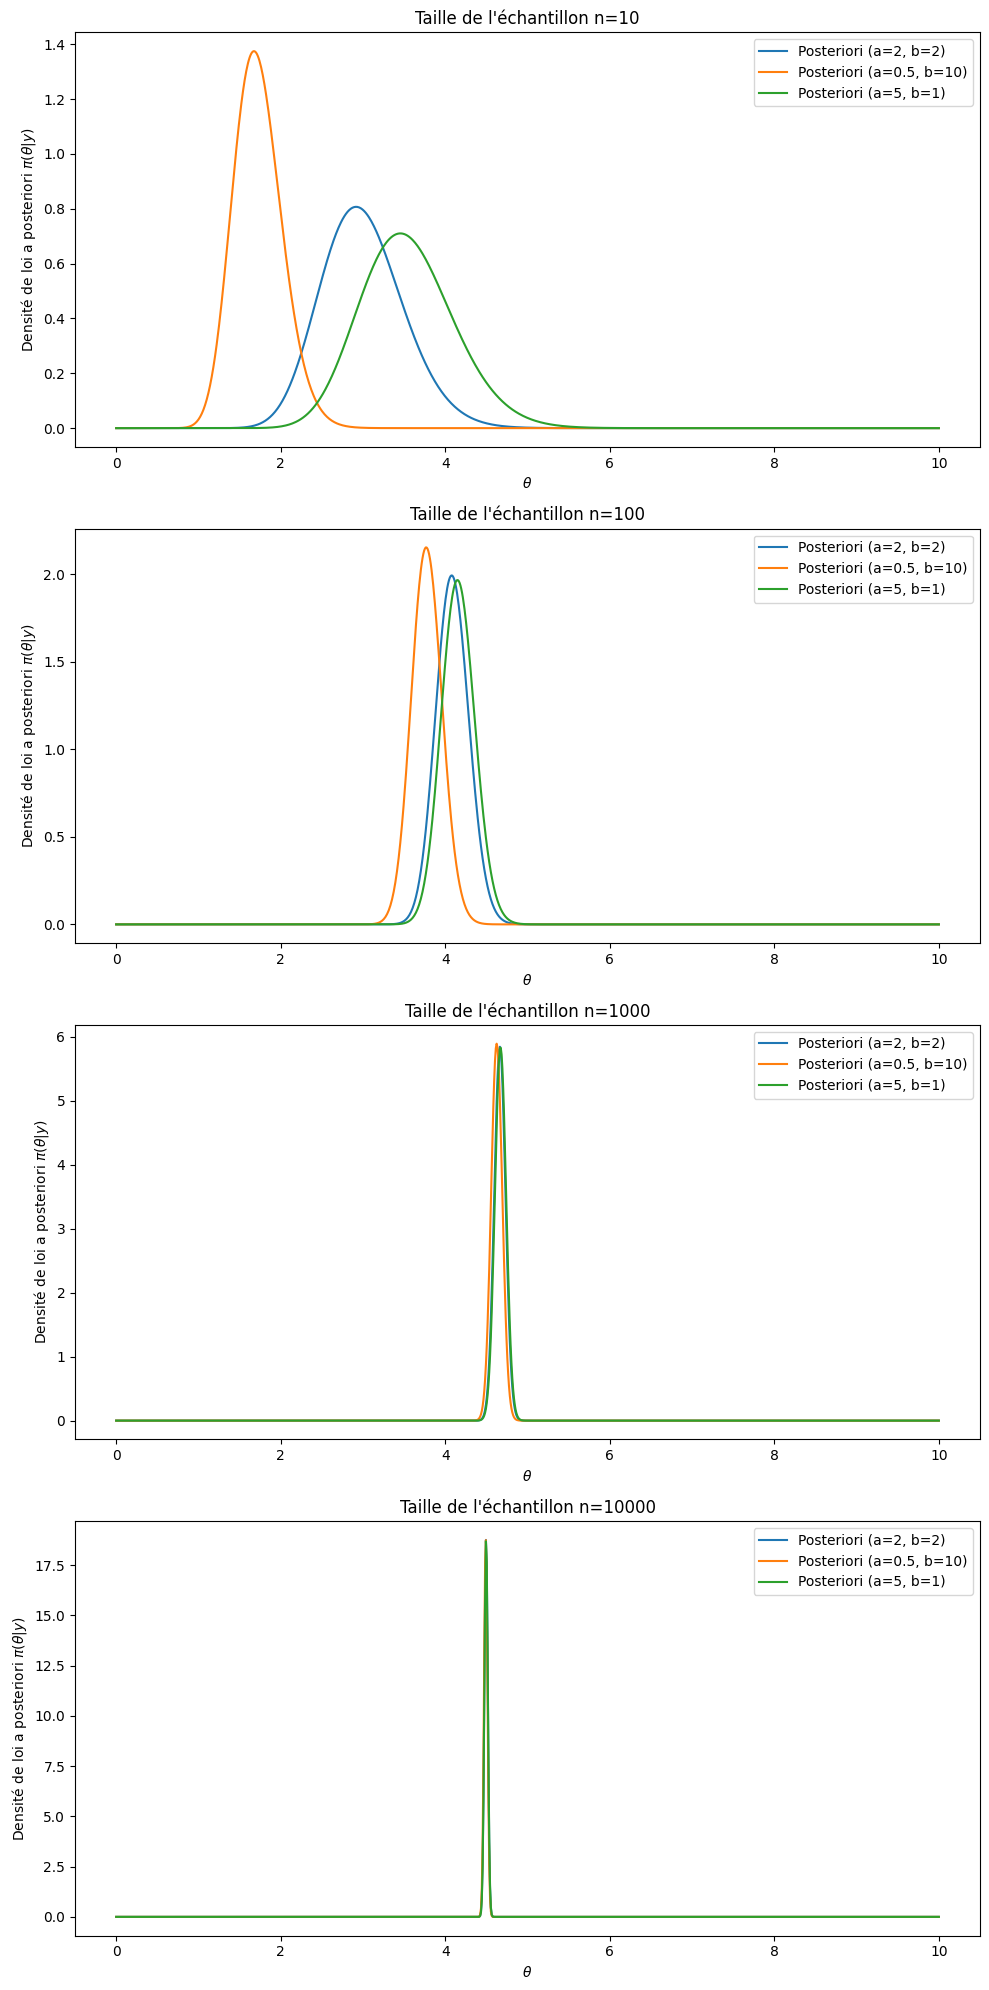

In [3]:
theta0 = 4.5
n_values = [10, 100, 1000, 10000]


# Fonction pour générer des échantillons et tracer les densités
def tracer_densites_posteriori_poisson(theta0, n_values, parametres):
    # Créer une figure pour les sous-graphiques
    fig, axs = plt.subplots(len(n_values), 1, figsize=(10, 20))

    for i, n in enumerate(n_values):
        # Générer des échantillons de taille n suivant une distribution Poisson
        y = np.random.poisson(theta0, n)
        
        # Calculer les densités a posteriori pour chaque (a, b)
        theta = np.linspace(0, 10, 1000)
        for (a, b) in parametres:
            new_a = a + np.sum(y)
            new_b = b + n
            densite = sps.gamma.pdf(theta, new_a, scale=1/new_b)
            axs[i].plot(theta, densite, label=f'Posteriori (a={a}, b={b})')
        
        # Configurer le sous-graphe
        axs[i].set_title(f'Taille de l\'échantillon n={n}')
        axs[i].set_xlabel(r'$\theta$')
        axs[i].set_ylabel(r'Densité de loi a posteriori $\pi(\theta|y)$')
        axs[i].legend()

    # Ajuster la mise en page
    plt.tight_layout()
    plt.show()

# Appeler la fonction pour tracer les densités
tracer_densites_posteriori_poisson(theta0, n_values, parametres)

Ces graphiques illustrent comment les densités a posteriori de la distribution Gamma évoluent en fonction de la taille de l'échantillon n. Nous observons qu'avec une augmentation de n, les densités a posteriori deviennent plus étroites et se resserrent autour d'un pic centré à $\theta = 4.5$.

Initialement, pour de petites tailles d'échantillon, les densités a posteriori présentent une plus grande variabilité et sont influencées de manière significative par les paramètres a priori. Cependant, à mesure que la taille de l'échantillon augmente, l'influence des paramètres a priori diminue et les données deviennent plus prédominantes. Cela se traduit par des densités a posteriori plus précises et plus concentrées autour de la vraie valeur de $\theta$.

En conséquence, les densités a posteriori convergent vers une distribution plus étroite et plus centrée à mesure que la taille de l'échantillon augmente, ce qui témoigne d'une amélioration de la précision de l'estimation de $\theta$ à partir des données observées.


### T3.

On a $\int_{\Theta} \theta \cdot \pi(\theta|\textbf{y}) d\theta = \mathbb{E}[\theta|\textbf{y}] $

De plus, on sait que 

$
\begin{cases}
    \pi(\theta|\textbf{y}) \text{ est de loi } Gamma(a+S(\textbf{y}), b+n)\\
    \mathbb{E}[Gamma(\alpha,\beta)] = \alpha/\beta
\end{cases}\\
$

$
\Rightarrow
\int_{\Theta} \theta \cdot \pi(\theta|\textbf{y}) d\theta = \frac{a+S(\textbf{y})}{b+n}\\
\Rightarrow
\hat{\theta}_n = \frac{a+S(\textbf{y})}{b+n}\\
\Rightarrow
\mathbb{E}[\hat{\theta}] = \mathbb{E}[\frac{a+S(\textbf{y})}{b+n}] = \frac{a+\mathbb{E}[S(\textbf{y})]}{b+n} = \frac{a+n\theta_0}{b+n}\\
\Rightarrow
\lim_{n \to \infty} \mathbb{E}[|\hat{\theta}_n-\theta_0|] = \lim_{n \to \infty} |\frac{a+n\theta_0}{b+n} - \theta_0| = 0\\
$

L'estimeateur $\hat{\theta}_n$ converge en moyenne (et donc en probabilité) vers $\theta_0$ quand n $\to \infty$

Plus les valeurs a et b sont grandes, plus L'estimeateur $\hat{\theta}_n$ converge lentement vers $\theta_0$




### S3.


In [4]:
#lam graph cho moi a,b khi n tang dan
for nval in n_values:
    # Générer des échantillons de taille n suivant une distribution Poisson
    y = np.random.poisson(theta0, nval)
        
    for (a, b) in parametres:
        
        #calculate l'estimateur theta hat
        est = (a + np.sum(y))/(b+nval)
        
        #calculate la difference entre l'estimateur et theta0
        diff = abs(est - theta0)
        
        print(f"For an echantillons de taille {nval} avec a = {a} and b = {b}")
        print(f"La difference entre l'estimateur et (\u03b8)\u2080 est = {diff}")
        
        

For an echantillons de taille 10 avec a = 2 and b = 2
La difference entre l'estimateur et (θ)₀ est = 1.3333333333333335
For an echantillons de taille 10 avec a = 0.5 and b = 10
La difference entre l'estimateur et (θ)₀ est = 2.675
For an echantillons de taille 10 avec a = 5 and b = 1
La difference entre l'estimateur et (θ)₀ est = 0.7727272727272729
For an echantillons de taille 100 avec a = 2 and b = 2
La difference entre l'estimateur et (θ)₀ est = 0.23529411764705888
For an echantillons de taille 100 avec a = 0.5 and b = 10
La difference entre l'estimateur et (θ)₀ est = 0.5590909090909091
For an echantillons de taille 100 avec a = 5 and b = 1
La difference entre l'estimateur et (θ)₀ est = 0.16336633663366307
For an echantillons de taille 1000 avec a = 2 and b = 2
La difference entre l'estimateur et (θ)₀ est = 0.045908183632734634
For an echantillons de taille 1000 avec a = 0.5 and b = 10
La difference entre l'estimateur et (θ)₀ est = 0.08267326732673297
For an echantillons de taille 10

## 2. Estimation de la constante de normalisation

### S4.



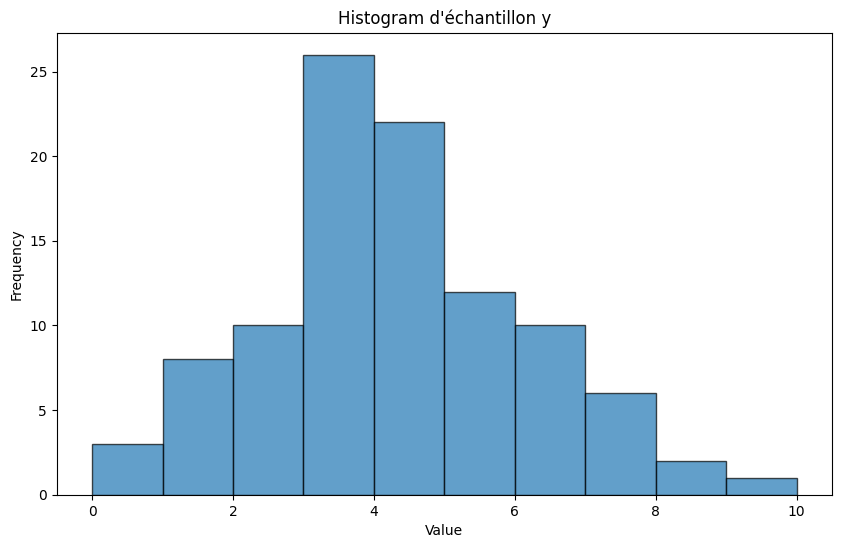

In [5]:
#Tirer un échantillon y de taille n = 100 de loi Poisson(3.8)
y = np.random.poisson(3.8, 100)

plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(0, max(y) + 2), edgecolor='black', alpha=0.7)
plt.title("Histogram d'échantillon y")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### T4.

$X_1, X_2, ..., X_K$ sont indépandants
$
\Rightarrow
\mathcal{L}(X_1;\textbf{y}), ... , \mathcal{L}(X_K;\textbf{y})
$
sont indépandants

De plus $\forall k$, on a $\mathcal{L}(X_k;\textbf{y}) = Z(\textbf{y})\pi(X_k|\textbf{y})/\pi(X_k)$

$
\Rightarrow \mathbb{E}[\mathcal{L}(X_k;\textbf{y})] = \int_{0}^{\infty}\frac{Z(\textbf{y})\pi(x|\textbf{y})}{\pi(x)}\pi(x)dx = Z(\textbf{y})\int_{0}^{\infty}\pi(x|\textbf{y})dx = Z(\textbf{y})
$

Donc 
$
\mathbb{E}[\hat{Z}_K] = \mathbb{E}[\frac{1}{K}\sum_{k=1}^{K}\mathcal{L}(X_k;\textbf{y})] = \frac{1}{K}\sum_{k=1}^{K}\mathbb{E}[\mathcal{L}(X_k;\textbf{y})] = \frac{1}{K}KZ(\textbf{y}) = Z(\textbf{y})
$

Ainsi, nous avons montre que l'estimateur $\hat{Z}_K$ est sans biais

Ensuite, on a $\mathcal{L}(X_k;\textbf{y})$ sont des i.i.d integrables, par la loi forte des Grands Nombres, on conclure que l'estimateur $\hat{Z_k}$ converge presque surment, en moyenne, en probabilite vers $Z(\textbf{y})$


### S5.


In [6]:
a,b = 2,2
K = 10000

#representer l'echantillon y par ses valeurs associee avec ses frequences
unique_values, counts = np.unique(y, return_counts=True)

#Implementer fonction de vraisemblance associee a y L(theta, y)
def L(theta, y):
    L = 1 
    for index, y_i in enumerate(unique_values):
        #calculate p(theta, y_i)
        p = sps.poisson.pmf(y_i, theta)
        #il y a counts[index] de valeur y_i dans echantillon y
        L = L*(p**counts[index]) 
    return L

#Implementer fonction d'estimateur
def estimate(K, a, b):
    Z_K = 0
    for i in range(K):
        #tirer X_k de loi gamma(a,b)
        X_k = np.random.gamma(a,1/b)
        Z_K += L(X_k,y)
    return Z_K/K

print(estimate(K,a,b))

        
    

1.6931956180300608e-91


### T5. 

$X_1, X_2, ..., X_K$ sont indépandants
$
\Rightarrow
\frac{\pi(X_1)}{g(X_1)}\mathcal{L}(X_1;\textbf{y}), ... , \frac{\pi(X_K)}{g(X_K)}\mathcal{L}(X_K;\textbf{y})
$
sont indépandants

De plus $\forall k$, on a $\mathcal{L}(X_k;\textbf{y}) = Z(\textbf{y})\pi(X_k|\textbf{y})/\pi(X_k)$

$
\Rightarrow \frac{\pi(X_k)}{g(X_k)}\mathcal{L}(X_k;\textbf{y}) = Z(\textbf{y})\frac{\pi(X_k|\textbf{y})}{{g(X_k)}}\\
$

$
\Rightarrow \mathbb{E}[\frac{\pi(X_k)}{g(X_k)}\mathcal{L}(X_k;\textbf{y})] = \int_{0}^{\infty}Z(\textbf{y})\frac{\pi(x|\textbf{y})}{{g(x)}}g(x)dx = Z(\textbf{y})\int_{0}^{\infty}\pi(x|\textbf{y})dx = Z(\textbf{y})
$

Donc 
$
\mathbb{E}[\hat{Z}_K^{'}] = \mathbb{E}[\frac{1}{K}\sum_{k=1}^{K}\frac{\pi(X_k)}{g(X_k)}\mathcal{L}(X_k;\textbf{y})] = \frac{1}{K}\sum_{k=1}^{K}\mathbb{E}[\frac{\pi(X_k)}{g(X_k)}\mathcal{L}(X_k;\textbf{y})] = \frac{1}{K}KZ(\textbf{y}) = Z(\textbf{y})
$

Ainsi, nous avons montre que l'estimateur $\hat{Z}_K^{'}$ est sans biais

Ensuite, on a $\frac{\pi(X_k)}{g(X_k)}\mathcal{L}(X_k;\textbf{y})$ sont des i.i.d integrables, par la loi forte des Grands Nombres, on conclure que l'estimateur $\hat{Z_k}^{'}$ converge presque surment, en moyenne, en probabilite vers $Z(\textbf{y})$

### T6.

(1) Lorsque $X_1, ..., X_K$ sont des i.i.d de densité $\pi(\theta)$, $\mathcal{L}(X_1;\textbf{y}), ... , \mathcal{L}(X_K;\textbf{y})$
sont indépandants

De plus $\forall k$, on a 
$
Var(\mathcal{L}(X_k;\textbf{y})) = Var[Z(\textbf{y})\pi(X_k|\textbf{y})/\pi(X_k)] = Z(\textbf{y})^2 Var[\pi(X_k|\textbf{y})/\pi(X_k)] = Z(\textbf{y})^2(\mathbb{E}[(\frac{\pi(X_k|\textbf{y})}{\pi(X_k)})^2] -\mathbb{E}[\frac{\pi(X_k|\textbf{y})}{\pi(X_k)}]) = Z(\textbf{y})^2(\int_{0}^{\infty}(\frac{\pi(x|\textbf{y})}{\pi(x)})^2 \pi(x)dx-1) = Z(\textbf{y})^2\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{\pi(x)} dx-Z(\textbf{y})^2\\
$

$
\Rightarrow Var(\hat{Z}_K) = \frac{1}{K^2}\sum_{k=1}^{K}Var(\mathcal{L}(X_k;\textbf{y})) = \frac{Z(\textbf{y})^2}{K}(\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{\pi(x)} dx-1)
$

(2) Ensuite, lorsque $X_1, ..., X_K$ sont des i.i.d de densité g, $\mathcal{L}(X_1;\textbf{y}), ... , \mathcal{L}(X_K;\textbf{y})$
sont indépandants

De plus $\forall k$, on a 
$
Var(\frac{\pi(X_k)}{g(X_k)} \mathcal{L}(X_K;\textbf{y})) = Var[\frac{\pi(X_k)}{g(X_k)}Z(\textbf{y})\frac{\pi(X_k|\textbf{y})}{\pi(X_k)}] = Z(\textbf{y})^2 Var[\pi(X_k|\textbf{y})/g(X_k)] = Z(\textbf{y})^2(\mathbb{E}[(\frac{\pi(X_k|\textbf{y})}{g(X_k)})^2] -\mathbb{E}[\frac{\pi(X_k|\textbf{y})}{g(X_k)}]) = Z(\textbf{y})^2(\int_{0}^{\infty}(\frac{\pi(x|\textbf{y})}{g(x)})^2 g(x)dx-1) = Z(\textbf{y})^2\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{g(x)} dx-Z(\textbf{y})^2\\
$

$
\Rightarrow Var(\hat{Z^{'}_K}) = \frac{1}{K^2}\sum_{k=1}^{K}Var(\frac{\pi(X_k)}{g(X_k)}\mathcal{L}(X_k;\textbf{y})) = \frac{Z(\textbf{y})^2}{K}(\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{g(x)} dx-1)
$

Pour que $Var(\hat{Z_K^{'}}) < Var(\hat{Z_K})$, on peut poser la condition $\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{g(x)} dx < \int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{\pi(x)} dx$

En effet, si $\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{g(x)} dx < \int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{\pi(x)} dx$

$
\Rightarrow \frac{Z(\textbf{y})^2}{K}(\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{g(x)} dx-1) < \frac{Z(\textbf{y})^2}{K}(\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{\pi(x)} dx-1)
$

$
\Rightarrow Var(\hat{Z_K^{'}}) < Var(\hat{Z_K})
$

Quand $g = \pi(\theta|\textbf{y})$, On a 
$Var(\hat{Z_K^{'}}) = \frac{Z(\textbf{y})^2}{K}(\int_{0}^{\infty}\frac{\pi(x|\textbf{y})^2}{\pi(x|\textbf{y})} dx-1) = 0
$

Donc la variance $Var(\hat{Z_K^{'}})$ est minimale pour g égale à la loi a posteriori.


### T7. Calculer la valeur de Z($\textbf{y}$) de manière analytique et comparer aux valeurs obtenues par les estimateurs ci-dessus

$
Z(\textbf{y}) = \int_{0}^{\infty}\pi(\theta)\mathcal{L}(\theta;\textbf{y})d\theta
$

On a 
$
\begin{cases}
    \pi(\theta) = \frac{2^2}{\Gamma(2)}\theta^{2-1}e^{-2\theta} = 4\theta e^{-2\theta} \\
    \mathcal{L}(\theta;\textbf{y}) = \frac{1}{\prod_{i=1}^{n}y_i!} \theta^{S(\textbf{y})} e^{-n\theta} = \frac{1}{\prod_{i=1}^{100}y_i!} \theta^{S(\textbf{y})} e^{-100\theta}
\end{cases}
$

$
\Rightarrow
Z(\textbf{y}) = \frac{4}{\prod_{i=1}^{100}y_i!}\int_{0}^{\infty}\theta^{S(\textbf{y})+1}e^{-102\theta}d\theta = \frac{4}{\prod_{i=1}^{100}y_i!}\int_{0}^{\infty}(\frac{102\theta}{102})^{S(\textbf{y})+1}e^{-102\theta}\frac{d(102\theta)}{102} = \frac{4}{\prod_{i=1}^{100}y_i! 102^{S(\textbf{y})+2}}\int_{0}^{\infty}(102\theta)^{S(\textbf{y})+1}e^{-102\theta}d(102\theta) = \frac{4}{\prod_{i=1}^{100}y_i! 102^{S(\textbf{y})+2}}\int_{0}^{\infty}\theta^{S(\textbf{y})+1}e^{\theta}d\theta = \frac{4}{\prod_{i=1}^{100}y_i! 102^{S(\textbf{y})+2}}\Gamma(S(\textbf{y})+2) = \frac{4 (S(\textbf{y})+1)!}{\prod_{i=1}^{100}y_i! 102^{S(\textbf{y})+2}}
$


### S6.


In [7]:
#Calculate Z(y)

S = sum(y)
print(S)

Zy = 1

prop = 100/(S+1) + 0.000000001
j = 0

for i in range(1, S+2):
    Zy *= i
    Zy /= 102
    if int(j + prop) > int(j):
        print(int(j))
        Zy /= math.factorial(y[int(j)])
    j += prop
Zy *= 4
Zy /= 102

print(Zy)



381
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2.1397158767074916e-91


## 3. Approximate Bayesian Computation (ABC)

### T8.

On a $d(z,y)=\|z-y\|^2=\sum_{i=1}^n(z_i-y_i)^2$, d'où $\{z\in\mathbb{N}^n\,|\,d(z,y)=0\}=\{y\}$. On a donc $\pi_e(\theta)=\pi(\theta|y)$. Ce cadre est inutilisable en pratique car il est peu probable que $y$ soit dans l'ensemble des valeurs possibles de $z$.

### T9.

On a $d(z,y)=|S(z)-S(y)|=|\sum_{i=1}^n z_i-\sum_{i=1}^n y_i|=|\sum_{i=1}^n z_i-y_i|=|S(z-y)|$. Donc $\{z\in\mathbb{N}^n\,|\,d(z,y)=0\}=\{y\}$. Il vient que $\pi_e(\theta)=\pi(\theta|y)$.

## 4. Modèle de mélange